## Ejemplo de red convolucinal con keras y mnist

In [9]:
import tensorflow.keras as k
k.__version__

'2.6.0'

In [10]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14897555624704436506
]


In [11]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(10, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(2, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 10)        260       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 10)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 2)           502       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 2)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 1,092
Trainable params: 1,092
Non-trainable params: 0
____________________________________________________

In [12]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print (train_images.shape)
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

(60000, 28, 28)


In [15]:
batch_size = 1000
epochs = 10

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1" 

history=model.fit(train_images, train_labels,
          batch_size=batch_size,
          epochs=epochs,validation_data=(test_images, test_labels),
          verbose=1
          )

Epoch 1/10


AttributeError: in user code:

    /home/danipeix/.local/lib/python3.8/site-packages/keras/engine/training.py:853 train_function  *
        return step_function(self, iterator)
    /home/danipeix/.local/lib/python3.8/site-packages/keras/engine/training.py:845 step_function  **
        write_scalar_summaries(outputs, step=model._train_counter)  # pylint: disable=protected-access
    /home/danipeix/.local/lib/python3.8/site-packages/keras/engine/training.py:2977 write_scalar_summaries
        tf.summary.scalar('batch_' + name, value, step=step)
    /home/danipeix/.local/lib/python3.8/site-packages/tensorboard/plugins/scalar/summary_v2.py:84 scalar
        getattr(tf.summary.experimental, "summary_scope", None)

    AttributeError: module 'tensorboard.summary._tf.summary' has no attribute 'experimental'


Evaluación modelo

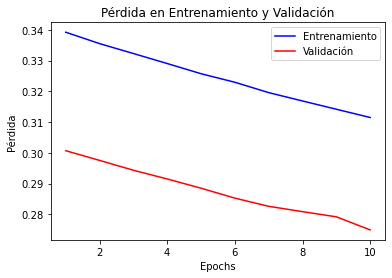

In [11]:
import matplotlib.pyplot as plt

ent_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(ent_loss) + 1)

plt.plot(epochs, ent_loss, 'b', label='Entrenamiento')
plt.plot(epochs, val_loss, 'r', label='Validación')
plt.title('Pérdida en Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Pérdida')
plt.legend()

plt.show()